In [131]:
import pandas as pd 

df = pd.read_csv("/Users/emirulurak/Desktop/dev/ozu/openseadata/dataset/metadata_old_dataset_rarity_new_159.csv")

In [132]:
len(df)

36000

In [133]:

valid_slice = [3001, 5990, 8991, 11992, 14993, 17994, 20995, 23996, 26997, 29998, 32999]

In [134]:
col_names = ['Shadowy Super Coder', "shin sengoku", "DeGod", "SMB", "Degen Ape", "Okay Bear", "Fox", "Remnants", "Cet", "y00t", "Blocksmith Labs", "Degen Fat Cat"]
col_dict = {}

In [135]:
for i in range(len(valid_slice)+1):
    if i == 0:
        collection = df['data_name'][:valid_slice[i]]
    elif i > 0 and i < len(valid_slice):
        collection = df['data_name'][valid_slice[i-1]:valid_slice[i]]
    else:
        collection = df['data_name'][valid_slice[i-1]:]
    col_dict[col_names[i]] = collection.values

In [136]:
col_dict[col_names[-1]]

array(['Degen Fat Cat the 9068th', 'Degen Fat Cat the 6640th',
       'Degen Fat Cat the 4640th', ..., 'Degen Fat Cat the 17893rd',
       'Degen Fat Cat the 19104th', 'Degen Fat Cat the 13315th'],
      dtype=object)

In [137]:
import ast

def extract_rank(row):
    try:
        try:
            return row['merarity']['moonrank']['rank'] if row else None
        except:
            return row['moonrank']['rank'] if row else None
    except:
        return None
    

def convert_to_dict(string_repr):
    try:
        return ast.literal_eval(string_repr)
    except (SyntaxError, ValueError):
        return None


In [138]:
df['dict'] = df['rarity'].apply(convert_to_dict)

In [139]:
df['rank_values_moonrank'] = df['dict'].apply(extract_rank)

In [140]:
df.columns

Index(['data_name', 'rarity', 'dict', 'rank_values_moonrank'], dtype='object')

In [141]:
df.columns

Index(['data_name', 'rarity', 'dict', 'rank_values_moonrank'], dtype='object')

In [142]:
df['rank_values_moonrank']

0         6271.0
1         6675.0
2         8589.0
3          973.0
4         3630.0
          ...   
35995    10880.0
35996     6720.0
35997    16793.0
35998     3691.0
35999    19089.0
Name: rank_values_moonrank, Length: 36000, dtype: float64

In [143]:
len(df)

36000

In [144]:
df.head()

,data_name,rarity,dict,rank_values_moonrank
0,Shadowy Super Coder #8854,{'merarity': {'tokenKey': 'C7QCcmTJNE5o67uM3XM...,{'merarity': {'tokenKey': 'C7QCcmTJNE5o67uM3XM...,6271.0
1,Shadowy Super Coder #8353,{'merarity': {'tokenKey': 'NJDoMZ8sZH9XeyeKvyb...,{'merarity': {'tokenKey': 'NJDoMZ8sZH9XeyeKvyb...,6675.0
2,Shadowy Super Coder #8124,{'merarity': {'tokenKey': 'CM8LUzDmvQ9FvgXFN3a...,{'merarity': {'tokenKey': 'CM8LUzDmvQ9FvgXFN3a...,8589.0
3,Shadowy Super Coder #2793,{'merarity': {'tokenKey': 'EXhiaHJoKvPHXV1u9wA...,{'merarity': {'tokenKey': 'EXhiaHJoKvPHXV1u9wA...,973.0
4,Shadowy Super Coder #7298,{'merarity': {'tokenKey': 'BjFBT8sbemnGoRirAsv...,{'merarity': {'tokenKey': 'BjFBT8sbemnGoRirAsv...,3630.0


In [145]:
df['label'] = 0.0

In [146]:
for i in range(len(valid_slice)+1):
    if i == 0:
        max_val = df['rank_values_moonrank'][:valid_slice[i]].max()
        df['label'][:valid_slice[i]] = df['rank_values_moonrank'][:valid_slice[i]] / max_val
    elif i > 0 and i < len(valid_slice):
        max_val = df['rank_values_moonrank'][valid_slice[i-1]:valid_slice[i]].max()
        df['label'][valid_slice[i-1]:valid_slice[i]] = df['rank_values_moonrank'][valid_slice[i-1]:valid_slice[i]] / max_val
    else:
        max_val = df['rank_values_moonrank'][valid_slice[i-1]:].max()
        df['label'][valid_slice[i-1]:] = df['rank_values_moonrank'][valid_slice[i-1]:] / max_val

/var/folders/4q/s3tqg3wd135drgqkjjmt5fpc0000gn/T/ipykernel_41156/3905693655.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['label'][:valid_slice[i]] = df['rank_values_moonrank'][:valid_slice[i]] / max_val
/var/folders/4q/s3tqg3wd135drgqkjjmt5fpc0000gn/T/ipykernel_41156/3905693655.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['label'][valid_slice[i-1]:valid_slice[i]] = df['rank_values_moonrank'][valid_slice[i-1]:valid_slice[i]] / max_val
/var/folders/4q/s3tqg3wd135drgqkjjmt5fpc0000gn/T/ipykernel_41156/3905693655.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataF

In [147]:
for i in range(len(valid_slice)+1):
    if i == 0:
        max_val = df['label'][:valid_slice[i]].max()
        print(max_val)
    elif i > 0 and i < len(valid_slice):
        max_val = df['label'][valid_slice[i-1]:valid_slice[i]].max()
        print(max_val)
    else:
        max_val = df['label'][valid_slice[i-1]:].max()
        print(max_val)

1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0


In [148]:
df.to_csv("159.csv")

In [149]:
col_dict = {}

In [150]:
label_dist = {}

In [151]:
for i in range(len(valid_slice)+1):
    if i == 0:
        max_rarity = df['rank_values_moonrank'][:valid_slice[i]].values.max()
        # df['label'][:valid_slice[i]] =  df['rank_values_merarity'][:valid_slice[i]] / max_rarity
        label_dist[col_names[i]] = df['label'][:valid_slice[i]]
    elif i > 0 and i < len(valid_slice):
        max_rarity = df['rank_values_moonrank'][valid_slice[i-1]:valid_slice[i]].values.max()
        # df['label'][valid_slice[i-1]:valid_slice[i]] =  df['rank_values_merarity'][valid_slice[i-1]:valid_slice[i]] / max_rarity
        label_dist[col_names[i]] = df['label'][valid_slice[i-1]:valid_slice[i]]
    else:
        max_rarity = df['rank_values_moonrank'][valid_slice[i-1]:].values.max()
        # df['label'][valid_slice[i-1]:] = df['rank_values_merarity'][valid_slice[i-1]:] / max_rarity
        label_dist[col_names[i]] = df['label'][valid_slice[i-1]:].values
    

In [152]:
df.head()

,data_name,rarity,dict,rank_values_moonrank,label
0,Shadowy Super Coder #8854,{'merarity': {'tokenKey': 'C7QCcmTJNE5o67uM3XM...,{'merarity': {'tokenKey': 'C7QCcmTJNE5o67uM3XM...,6271.0,0.627163
1,Shadowy Super Coder #8353,{'merarity': {'tokenKey': 'NJDoMZ8sZH9XeyeKvyb...,{'merarity': {'tokenKey': 'NJDoMZ8sZH9XeyeKvyb...,6675.0,0.667567
2,Shadowy Super Coder #8124,{'merarity': {'tokenKey': 'CM8LUzDmvQ9FvgXFN3a...,{'merarity': {'tokenKey': 'CM8LUzDmvQ9FvgXFN3a...,8589.0,0.858986
3,Shadowy Super Coder #2793,{'merarity': {'tokenKey': 'EXhiaHJoKvPHXV1u9wA...,{'merarity': {'tokenKey': 'EXhiaHJoKvPHXV1u9wA...,973.0,0.097310
4,Shadowy Super Coder #7298,{'merarity': {'tokenKey': 'BjFBT8sbemnGoRirAsv...,{'merarity': {'tokenKey': 'BjFBT8sbemnGoRirAsv...,3630.0,0.363036


In [153]:
label_dist

{'Shadowy Super Coder': 0       0.627163
 1       0.667567
 2       0.858986
 3       0.097310
 4       0.363036
           ...   
 2996    0.948295
 2997    0.576958
 2998    0.249725
 2999    0.264826
 3000    0.350935
 Name: label, Length: 3001, dtype: float64,
 'shin sengoku': 3001    0.400880
 3002    0.158232
 3003    0.965193
 3004    0.241448
 3005    0.796159
           ...   
 5985    0.173235
 5986    0.055411
 5987    0.404081
 5988    0.043209
 5989    0.339868
 Name: label, Length: 2989, dtype: float64,
 'DeGod': 5990    0.626624
 5991    0.593027
 5992    0.253038
 5993    0.028209
 5994    0.619334
           ...   
 8986    0.888537
 8987    0.465821
 8988    0.269097
 8989    0.878922
 8990    0.815531
 Name: label, Length: 3001, dtype: float64,
 'SMB': 8991     0.443466
 8992     0.012808
 8993     0.756254
 8994     0.675205
 8995     0.959776
            ...   
 11987    0.715229
 11988    0.853712
 11989    0.861717
 11990    0.505303
 11991    0.785471
 Name: lab

In [154]:
# import math
# from torch.utils.data import Dataset
# import os
# import numpy as np

# class RarityDataset(Dataset):
#     def __init__(self, csv_dir, col_names, image_dir, transform):
#         self.labels = pd.read_csv(csv_dir)
#         self.col_names = col_names
#         self.transform = transform
#         self.image_dir = image_dir

#     def drop_nan_ones(self):
#         max_col_rarity = self.col_max_rarity.copy()
#         self.collection_drop = []
#         for key, val in max_col_rarity.items():
#             if math.isnan(val):
#                 print(f"{key}:{val}")
#                 self.col_max_rarity.pop(key)
#                 self.collection_drop.append(key)
#         for key in self.collection_drop:
#             self.labels.drop(self.labels[self.labels['data_name'].str.startswith(key)].index, inplace=True)
#         self.labels.dropna(inplace=True)
#         self.labels.reset_index(inplace=True)

#     def __len__(self):
#         return len(self.labels)

#     def calculate_rarity(self):
#         max_col_rarities = {}
#         for col in self.col_names:
#             filtered_df = self.labels[self.labels["data_name"].str.startswith(col)]
#             max_col_rarities[col] = filtered_df["rank_values"].max()
#         return max_col_rarities

#     def get_col_labels(self, col_name):
#         return self.labels[self.labels['data_name'].str.startswith(col_name)].index
    
#     def __getitem__(self, index):
#         self.col_name = self.labels['data_name'][index].split("_")[0] # bu olabilir
#         img_dir = os.path.join(self.image_dir, self.labels['data_name'][index])
#         img = np.array(Image.open(img_dir).convert('RGB'))
#         if self.transform:
#             img = self.transform(img)
#         return img, self.labels['rank_values'][index] / self.col_max_rarity[self.col_name]

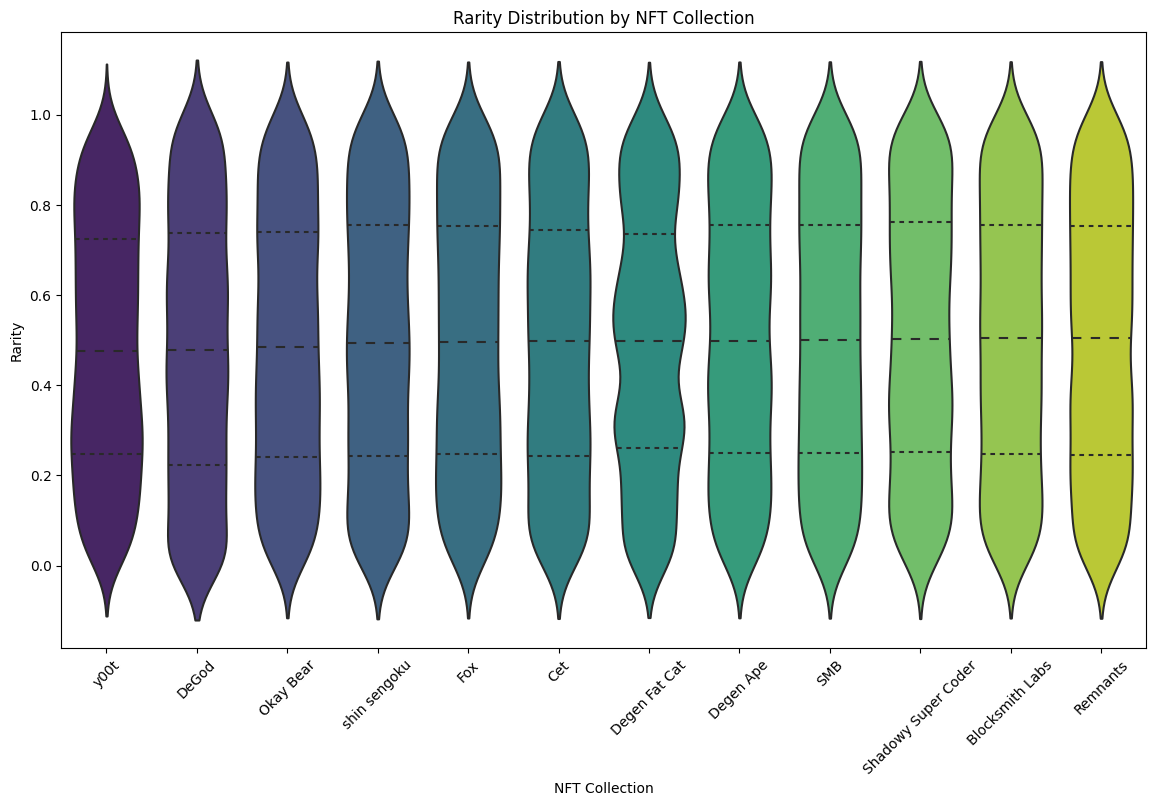

Thresholds for each collection:
collection_name
Blocksmith Labs        0.049730
Cet                    0.044899
DeGod                  0.000000
Degen Ape              0.050600
Degen Fat Cat          0.031454
Fox                    0.054894
Okay Bear              0.046814
Remnants               0.043212
SMB                    0.049830
Shadowy Super Coder    0.055306
shin sengoku           0.039088
y00t                   0.054766
Name: rarity, dtype: float64


In [157]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming you have a dictionary label_dist with rarity data
# Replace 'label_dist' with the actual dictionary variable
# valid_list is assumed to be a list of collection names

# Create an empty DataFrame to store the data
df = pd.DataFrame(columns=['collection_name', 'rarity'])

# Populate the DataFrame with data from label_dist
for col_name, rarity_values in label_dist.items():
    df = pd.concat([df, pd.DataFrame({'collection_name': [col_name] * len(rarity_values), 'rarity': rarity_values})])

# Create a violin plot to visualize the rarity distribution for each collection
plt.figure(figsize=(14, 8))
sns.violinplot(x='collection_name', y='rarity', data=df, palette="viridis", inner="quartile", order=df.groupby('collection_name')['rarity'].median().sort_values().index)
plt.title('Rarity Distribution by NFT Collection')
plt.xlabel('NFT Collection')
plt.ylabel('Rarity')
plt.xticks(rotation=45)
plt.show()

# Calculate the 5th percentile as a threshold for rare items for each collection
thresholds = df.groupby('collection_name')['rarity'].quantile(0.05)

# Print the thresholds for each collection
print("Thresholds for each collection:")
print(thresholds)

In [178]:
filter = (df['collection_name'] == "DeGod") & (df['rarity'] == 0.0)
result_df = df.loc[filter]

In [179]:
result_df

,collection_name,rarity
6004,DeGod,0.0
6058,DeGod,0.0
6153,DeGod,0.0
6155,DeGod,0.0
6157,DeGod,0.0
...,...,...
8875,DeGod,0.0
8883,DeGod,0.0
8907,DeGod,0.0
8915,DeGod,0.0


In [168]:

for i in col_names:
    print(len(label_dist[i]))

3001
2989
3001
3001
3001
3001
3001
3001
3001
3001
3001
3001


In [169]:
for col_name in col_names:
    new_l = []
    new_l = [x for x in label_dist[col_name] if x <= thresholds[col_name]]
    print(f"{col_name}: {len(new_l)}:  {sorted(new_l)[0]}")

Shadowy Super Coder: 151:  0.00020002000200020003
shin sengoku: 150:  0.00020004000800160032
DeGod: 158:  0.0
SMB: 151:  0.00020012007204322593
Degen Ape: 150:  0.0005001500450135041
Okay Bear: 150:  0.00040016006402561027
Fox: 150:  0.00012861736334405144
Remnants: 150:  0.00025
Cet: 150:  0.00014349261013057828
y00t: 147:  8.09192425958893e-05
Blocksmith Labs: 151:  0.0006750675067506751
Degen Fat Cat: 150:  0.0005502476114251413


In [181]:
df = pd.read_csv("./159.csv")

In [182]:
df['cls_label'] = 0

In [183]:
df

,Unnamed: 0,data_name,rarity,dict,rank_values_moonrank,label,cls_label
0,0,Shadowy Super Coder #8854,{'merarity': {'tokenKey': 'C7QCcmTJNE5o67uM3XM...,{'merarity': {'tokenKey': 'C7QCcmTJNE5o67uM3XM...,6271.0,0.627163,0
1,1,Shadowy Super Coder #8353,{'merarity': {'tokenKey': 'NJDoMZ8sZH9XeyeKvyb...,{'merarity': {'tokenKey': 'NJDoMZ8sZH9XeyeKvyb...,6675.0,0.667567,0
2,2,Shadowy Super Coder #8124,{'merarity': {'tokenKey': 'CM8LUzDmvQ9FvgXFN3a...,{'merarity': {'tokenKey': 'CM8LUzDmvQ9FvgXFN3a...,8589.0,0.858986,0
3,3,Shadowy Super Coder #2793,{'merarity': {'tokenKey': 'EXhiaHJoKvPHXV1u9wA...,{'merarity': {'tokenKey': 'EXhiaHJoKvPHXV1u9wA...,973.0,0.097310,0
4,4,Shadowy Super Coder #7298,{'merarity': {'tokenKey': 'BjFBT8sbemnGoRirAsv...,{'merarity': {'tokenKey': 'BjFBT8sbemnGoRirAsv...,3630.0,0.363036,0
...,...,...,...,...,...,...,...
35995,35995,Degen Fat Cat the 17694th,{'merarity': {'tokenKey': '5FSmN7Z1rTpVRuiMXkq...,{'merarity': {'tokenKey': '5FSmN7Z1rTpVRuiMXkq...,10880.0,0.544245,0
35996,35996,Degen Fat Cat the 5841st,{'merarity': {'tokenKey': '9BgydnArQggu7LeiDmT...,{'merarity': {'tokenKey': '9BgydnArQggu7LeiDmT...,6720.0,0.336151,0
35997,35997,Degen Fat Cat the 17893rd,{'merarity': {'tokenKey': 'v2gw5v2vj4uPrqGGaH6...,{'merarity': {'tokenKey': 'v2gw5v2vj4uPrqGGaH6...,16793.0,0.840028,0
35998,35998,Degen Fat Cat the 19104th,{'merarity': {'tokenKey': '4ErvdC4m4Bf6TyE1GH7...,{'merarity': {'tokenKey': '4ErvdC4m4Bf6TyE1GH7...,3691.0,0.184633,0


In [184]:
import pandas as pd

# Assuming df, valid_slice, thresholds, and col_names are defined

for i in range(len(valid_slice) + 1):
    if i == 0:
        df.loc[:valid_slice[i], 'cls_label'] = df['label'][:valid_slice[i]].apply(lambda x: 1 if x <= thresholds[col_names[i]] else 0)
            
    elif i > 0 and i < len(valid_slice):
        df.loc[valid_slice[i-1]:valid_slice[i], 'cls_label'] = df['label'][valid_slice[i-1]:valid_slice[i]].apply(lambda x: 1 if x <= thresholds[col_names[i]] else 0)
    
    else:
        df.loc[valid_slice[i-1]:, 'cls_label'] = df['label'][valid_slice[i-1]:].apply(lambda x: 1 if x <= thresholds[col_names[i]] else 0)

In [185]:
df[df['cls_label']==1.]

,Unnamed: 0,data_name,rarity,dict,rank_values_moonrank,label,cls_label
13,13,Shadowy Super Coder #152,{'merarity': {'tokenKey': '8YcttovNxg16aoruTLE...,{'merarity': {'tokenKey': '8YcttovNxg16aoruTLE...,403.0,0.040304,1.0
20,20,Shadowy Super Coder #5595,{'merarity': {'tokenKey': 'Hm5Ntt6jwwzTSNTPXVR...,{'merarity': {'tokenKey': 'Hm5Ntt6jwwzTSNTPXVR...,194.0,0.019402,1.0
27,27,Shadowy Super Coder #6222,{'merarity': {'tokenKey': 'CAApYq2kx12gS3E3aNX...,{'merarity': {'tokenKey': 'CAApYq2kx12gS3E3aNX...,382.0,0.038204,1.0
36,36,Shadowy Super Coder #5925,{'merarity': {'tokenKey': '2apZJYRsUTUMzswFPCg...,{'merarity': {'tokenKey': '2apZJYRsUTUMzswFPCg...,414.0,0.041404,1.0
42,42,Shadowy Super Coder #8840,{'merarity': {'tokenKey': '65Ev1N6q51gbXu4HUQj...,{'merarity': {'tokenKey': '65Ev1N6q51gbXu4HUQj...,27.0,0.002700,1.0
...,...,...,...,...,...,...,...
35898,35898,Degen Fat Cat the 322nd,{'merarity': {'tokenKey': '7SDvK29n1Ug2p2vesqx...,{'merarity': {'tokenKey': '7SDvK29n1Ug2p2vesqx...,50.0,0.002501,1.0
35909,35909,Degen Fat Cat the 442nd,{'merarity': {'tokenKey': 'EaPMSjMEgp8zBE8d7h2...,{'merarity': {'tokenKey': 'EaPMSjMEgp8zBE8d7h2...,201.0,0.010055,1.0
35928,35928,Degen Fat Cat the 13466th,{'merarity': {'tokenKey': 'DZ8kfDJShM4NoNT5J6R...,{'merarity': {'tokenKey': 'DZ8kfDJShM4NoNT5J6R...,618.0,0.030914,1.0
35930,35930,Degen Fat Cat the 431st,{'merarity': {'tokenKey': '3j5AaZzsJzbJyXXNici...,{'merarity': {'tokenKey': '3j5AaZzsJzbJyXXNici...,201.0,0.010055,1.0


In [145]:
150 * 12

1800

In [191]:
df

,Unnamed: 0,data_name,rarity,dict,rank_values_moonrank,label,cls_label
0,0,Shadowy Super Coder #8854,{'merarity': {'tokenKey': 'C7QCcmTJNE5o67uM3XM...,{'merarity': {'tokenKey': 'C7QCcmTJNE5o67uM3XM...,6271.0,0.627163,0.0
1,1,Shadowy Super Coder #8353,{'merarity': {'tokenKey': 'NJDoMZ8sZH9XeyeKvyb...,{'merarity': {'tokenKey': 'NJDoMZ8sZH9XeyeKvyb...,6675.0,0.667567,0.0
2,2,Shadowy Super Coder #8124,{'merarity': {'tokenKey': 'CM8LUzDmvQ9FvgXFN3a...,{'merarity': {'tokenKey': 'CM8LUzDmvQ9FvgXFN3a...,8589.0,0.858986,0.0
3,3,Shadowy Super Coder #2793,{'merarity': {'tokenKey': 'EXhiaHJoKvPHXV1u9wA...,{'merarity': {'tokenKey': 'EXhiaHJoKvPHXV1u9wA...,973.0,0.097310,0.0
4,4,Shadowy Super Coder #7298,{'merarity': {'tokenKey': 'BjFBT8sbemnGoRirAsv...,{'merarity': {'tokenKey': 'BjFBT8sbemnGoRirAsv...,3630.0,0.363036,0.0
...,...,...,...,...,...,...,...
35995,35995,Degen Fat Cat the 17694th,{'merarity': {'tokenKey': '5FSmN7Z1rTpVRuiMXkq...,{'merarity': {'tokenKey': '5FSmN7Z1rTpVRuiMXkq...,10880.0,0.544245,0.0
35996,35996,Degen Fat Cat the 5841st,{'merarity': {'tokenKey': '9BgydnArQggu7LeiDmT...,{'merarity': {'tokenKey': '9BgydnArQggu7LeiDmT...,6720.0,0.336151,0.0
35997,35997,Degen Fat Cat the 17893rd,{'merarity': {'tokenKey': 'v2gw5v2vj4uPrqGGaH6...,{'merarity': {'tokenKey': 'v2gw5v2vj4uPrqGGaH6...,16793.0,0.840028,0.0
35998,35998,Degen Fat Cat the 19104th,{'merarity': {'tokenKey': '4ErvdC4m4Bf6TyE1GH7...,{'merarity': {'tokenKey': '4ErvdC4m4Bf6TyE1GH7...,3691.0,0.184633,0.0


In [192]:
df.columns

Index(['Unnamed: 0', 'data_name', 'rarity', 'dict', 'rank_values_moonrank',
       'label', 'cls_label'],
      dtype='object')

In [193]:
df.drop(["Unnamed: 0"], inplace=True, axis=1)

In [196]:
df.to_csv("./159.csv")